In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline 
sys.path.append('./pytools/')
from pytools import test, p_pce_bcs

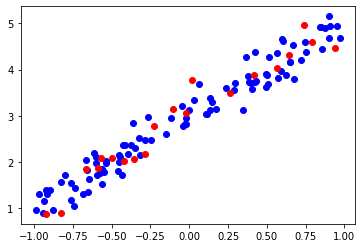

In [9]:
# Generate data from log-linear relationship: y = 2 * exp(xtrain) + 3 + noise
ntrain = 100
nval   = 20
xtrain = np.random.uniform(low=-1,high=1,size=(ntrain,1))
ytrain = 2*xtrain + 3 + np.random.normal(loc=0,scale=0.25,size=(ntrain,1))
xval = np.random.uniform(low=-1,high=1,size=(nval,1))
yval = 2*xval + 3 + np.random.normal(loc=0,scale=0.25,size=(nval,1))

plt.plot(xtrain,ytrain,'bo')
plt.plot(xval,yval,'ro')

In [7]:
pars = dict()
pars['pc_type']   = 'LU'
pars['in_pcdim']  = 1
pars['out_pcord'] = 3
pars['pred_mode'] = 'ms'
pars['tol']       = 1e-5

uqtkbin = '/Users/xudo627/projects/UQTk/UQTk-install/bin/'

************ Trainning Surrogate Model ************
##################################################
-------------------- 0th QOI --------------------
Running /Users/xudo627/projects/UQTk/UQTk-install/bin/gen_mi -x"TO" -p 3 -q1 > gmi.log
Running /Users/xudo627/projects/UQTk/UQTk-install/bin/regression -x xdata.dat -y ydata.dat -b PC_MI -s LU -p mi.dat -w regparams.dat -m ms -r wbcs -t xcheck.dat -c 1e-05 > regr.log
Evaluating surrogate at 100 training points
Running pce_eval -x'PC_mi' -f'pccf.dat' -sLU -r'mindex.dat' > fev.log
Surrogate relative error at training points : [0.07891943]
Evaluating surrogate at 20 validating points
Running pce_eval -x'PC_mi' -f'pccf.dat' -sLU -r'mindex.dat' > fev.log
Surrogate relative error at validating points : [0.09094981]


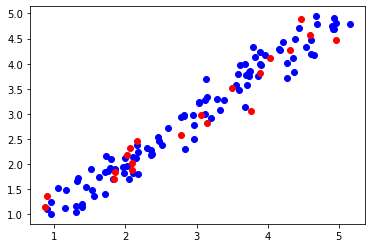

In [10]:
ytrain_pc, yval_pc, pccf_all, mindex_all = p_pce_bcs(uqtkbin,pars,xtrain,ytrain,xval,yval,1)
plt.plot(ytrain,ytrain_pc,'bo')
plt.plot(yval,yval_pc,'ro')

In [26]:
xcheck = np.vstack((xtrain,xval))
xcheck.shape

(120, 1)

In [46]:
a = np.loadtxt('coeff.dat')
a

array([2.99999992, 1.99999975])

In [49]:
np.savetxt('test.dat',a)